In [21]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
rewards = []

for n in range(1, 11):
    reward = np.random.rand()
    rewards.append(reward)
    Q = sum(rewards) / n
    print(Q)

0.5488135039273248
0.6320014351498722
0.6222554154571294
0.6029123573420713
0.567060845741438
0.5801997236289743
0.5598265075766483
0.6013198192273272
0.6415801460355164
0.6157662833145425


In [22]:
Q = 0
for n in range(1, 11):
    reward = np.random.rand()
    # Q = Q + (reward - Q) / n
    Q += (reward - Q) / n
    print(Q)

0.7917250380826646
0.6603099789177845
0.6295548396431672
0.7035652893055406
0.5770594430840099
0.49540441918693173
0.4275207017945595
0.4781580947637318
0.5114912787844116
0.5473433657306523


In [23]:
class Bandit:
    def __init__(self, arms=10):
        self.rates = np.random.rand(arms)

    def play(self, arm):
        rate = self.rates[arm]
        if rate > np.random.rand():
            return 1
        else:
            return 0


bandit = Bandit()
for i in range(3):
    print(bandit.play((0)))

1
1
1


In [24]:
bandit = Bandit()
Q = 0

for n in range(1, 20):
    reward = bandit.play(0)
    Q += (reward - Q) / n
    print(Q)
print(bandit.rates)

1.0
0.5
0.33333333333333337
0.5
0.6
0.6666666666666666
0.7142857142857143
0.625
0.6666666666666666
0.6
0.6363636363636364
0.6666666666666666
0.6923076923076923
0.6428571428571428
0.6666666666666666
0.6875
0.7058823529411765
0.7222222222222223
0.736842105263158
[0.56843395 0.0187898  0.6176355  0.61209572 0.616934   0.94374808
 0.6818203  0.3595079  0.43703195 0.6976312 ]


In [25]:
bandit = Bandit()
Qs = np.zeros(10)
ns = np.zeros(10)

for n in range(10):
    action = np.random.randint(0, 10)
    reward = bandit.play(action)
    ns[action] += 1
    Qs[action] += (reward - Qs[action]) / ns[action]
    print(Qs)

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[1.         0.         0.         0.         0.         0.
 0.         0.         0.         0.66666667]


In [26]:
class Agent:
    def __init__(self, epsilon, action_size=10):
        self.epsilon = epsilon
        self.Qs = np.zeros(action_size)
        self.ns = np.zeros(action_size)

    def update(self, action, reward):
        self.ns[action] += 1
        self.Qs[action] += (reward - self.Qs[action]) / self.ns[action]

    def get_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(0, len(self.Qs))
        else:
            return np.argmax(self.Qs)

645


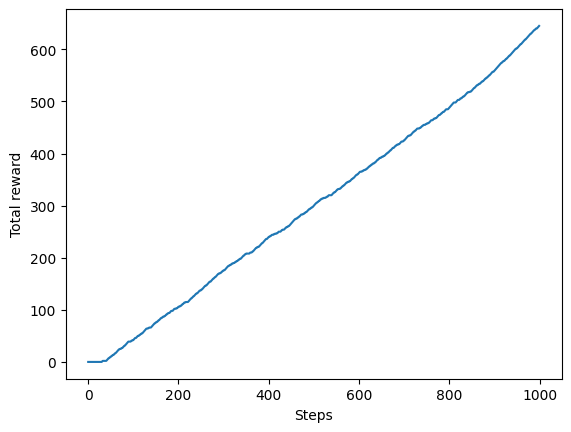

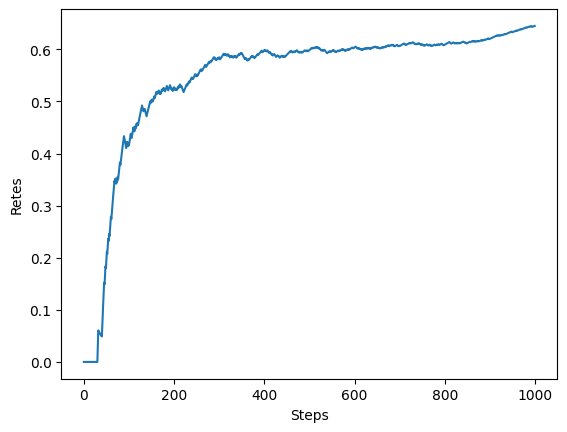

In [27]:
steps = 1000
epsilon = 0.1

bandit = Bandit()
agent = Agent(epsilon)
total_reward = 0
total_rewards = []
rates = []

for step in range(steps):
    action = agent.get_action()
    reward = bandit.play(action)
    agent.update(action, reward)
    total_reward += reward

    total_rewards.append(total_reward)
    rates.append(total_reward / (step + 1))

print(total_reward)

plt.ylabel('Total reward')
plt.xlabel('Steps')
plt.plot(total_rewards)
plt.show()

plt.ylabel('Retes')
plt.xlabel('Steps')
plt.plot(rates)
plt.show()

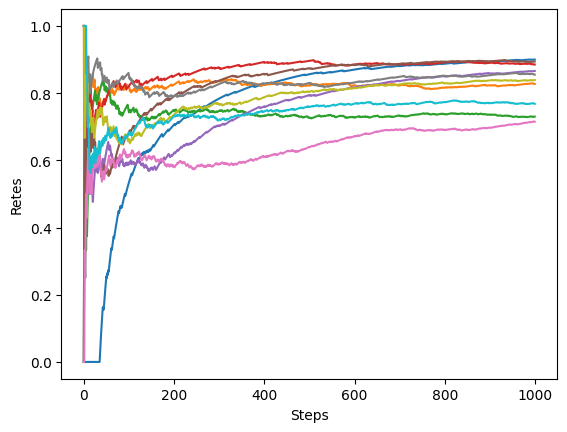

In [29]:
def run_one():
    steps = 1000
    epsilon = 0.1

    bandit = Bandit()
    agent = Agent(epsilon)
    total_reward = 0
    total_rewards = []
    rates = []

    for step in range(steps):
        action = agent.get_action()
        reward = bandit.play(action)
        agent.update(action, reward)
        total_reward += reward

        total_rewards.append(total_reward)
        rates.append(total_reward / (step + 1))
    return total_rewards, rates


_, rates1 = run_one()
_, rates2 = run_one()

plt.ylabel('Retes')
plt.xlabel('Steps')
for _ in range(10):
    _, rates = run_one()
    plt.plot(rates)
plt.show()

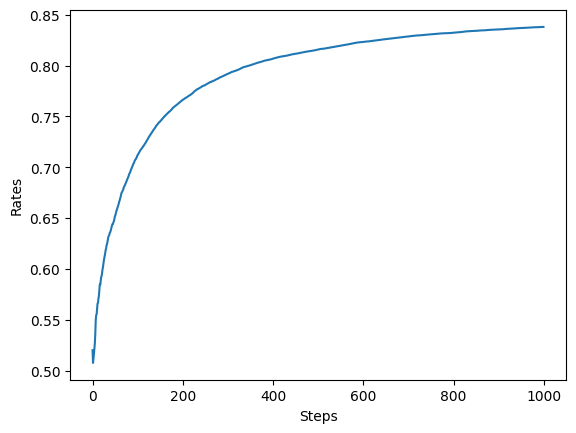

In [30]:
runs = 200
steps = 1000
epsilon = 0.1
all_rates = np.zeros((runs, steps))

for run in range(runs):
    bandit = Bandit()
    agent = Agent(epsilon)
    total_reward = 0
    rates = []

    for step in range(steps):
        action = agent.get_action()
        reward = bandit.play(action)
        agent.update(action, reward)
        total_reward += reward
        rates.append(total_reward / (step + 1))
        
    all_rates[run] = rates
avg_rates = np.average(all_rates, axis=0)

plt.ylabel('Rates')
plt.xlabel('Steps')
plt.plot(avg_rates)
plt.show()

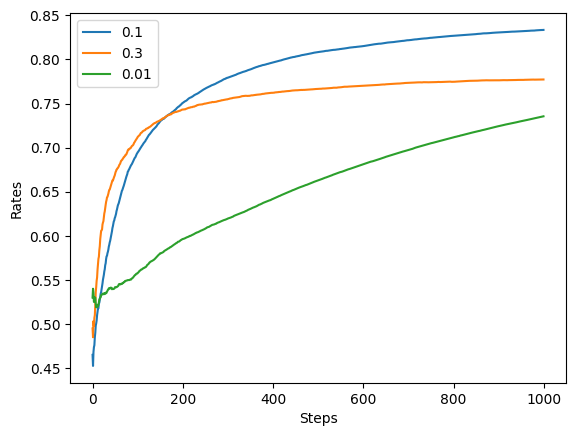

In [33]:
def run_much_epsilon(epsilon):
    runs = 200
    steps = 1000
    epsilon = epsilon
    all_rates = np.zeros((runs, steps))
    
    for run in range(runs):
        bandit = Bandit()
        agent = Agent(epsilon)
        total_reward = 0
        rates = []
    
        for step in range(steps):
            action = agent.get_action()
            reward = bandit.play(action)
            agent.update(action, reward)
            total_reward += reward
            rates.append(total_reward / (step + 1))
            
        all_rates[run] = rates
    return np.average(all_rates, axis=0)

plt.ylabel('Rates')
plt.xlabel('Steps')
legends = []
for epsilon in [0.1,0.3,0.01]:
    avg_rates = run_much_epsilon(epsilon)
    plt.plot(avg_rates)
    legends.append(str(epsilon))
plt.legend(legends)
plt.show()

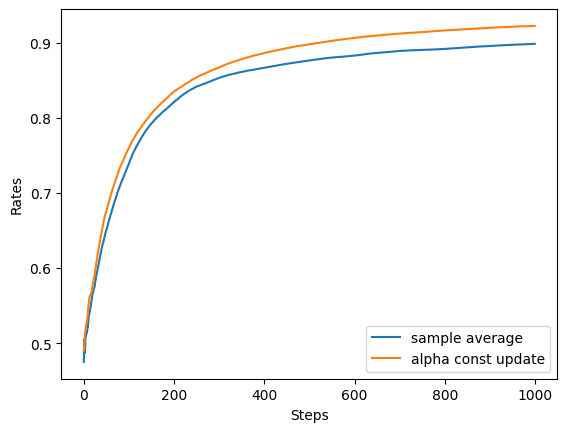

In [35]:
class NonStatBandit:
    def __init__(self, arms=10):
        self.arms = arms
        self.rates = np.random.rand(arms)
        
    def play(self, arm):
        rate = self.rates[arm]
        self.rates += 0.1 * np.random.randn(self.arms)
        if rate > np.random.rand():
            return 1
        else:
            return 0
        
class AlphaAgent:
    def __init__(self, epsilon, alpha, actions = 10):
        self.epsilon = epsilon
        self.Qs = np.zeros(actions)
        self.alpha = alpha
        
    def update(self, action, reward):
        self.Qs[action] += (reward - self.Qs[action]) * self.alpha
        
    def get_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(0, len(self.Qs))
        return np.argmax(self.Qs)
    
def run_with_alpha(is_alpha):
    runs = 200
    steps = 1000
    epsilon = 0.1
    all_rates = np.zeros((runs, steps))
    
    for run in range(runs):
        bandit = NonStatBandit()
        agent = AlphaAgent(epsilon, 0.8) if is_alpha else Agent(epsilon) 
        total_reward = 0
        rates = []
    
        for step in range(steps):
            action = agent.get_action()
            reward = bandit.play(action)
            agent.update(action, reward)
            total_reward += reward
            rates.append(total_reward / (step + 1))
            
        all_rates[run] = rates
    return np.average(all_rates, axis=0)

plt.ylabel('Rates')
plt.xlabel('Steps')
plt.plot(run_with_alpha(False))
plt.plot(run_with_alpha(True))
plt.legend(['sample average','alpha const update'])
plt.show()